In [193]:
import pandas as pd

df = pd.read_csv("combined_energy_data_2.csv", parse_dates=[["Dated","Hours"]],dayfirst=True, index_col="Dated_Hours")




In [222]:
df.shape

(123840, 67)

In [194]:
#subset
df1 = df.iloc[:, 0:34]
df1.to_csv('stage1.csv',index=1)
df1.head()

,Perimeter,Nature,Consumption,Forecast D-1,Forecast J,Fuel oil,Coal,Gas,Nuclear,Wind,...,Gas - TAC,Gas - Cogen.,Gas - CCG,Gas - Others,Hydraulic - Stream of water + lock,Hydraulics - Lakes,Hydraulics - STEP turbines,Bioenergies - Waste,Bioenergies - Biomass,Bioenergies - Biogas
Dated_Hours,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,France,Données définitives,76259.0,76100,76500,164.0,1579.0,7617.0,53528.0,267.0,...,-2,2374.0,5194.0,51.0,2592.0,3454.0,498.0,559.0,286.0,245.0
2017-01-01 00:15:00,France,Données définitives,NaN,75500,75800,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:30:00,France,Données définitives,74981.0,74900,75100,601.0,1506.0,6626.0,53456.0,311.0,...,8,2372.0,4185.0,61.0,2717.0,3671.0,533.0,559.0,285.0,256.0
2017-01-01 00:45:00,France,Données définitives,NaN,74150,74250,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,France,Données définitives,72912.0,73400,73400,596.0,1291.0,6593.0,53431.0,351.0,...,8,2375.0,4149.0,61.0,2661.0,2522.0,385.0,556.0,283.0,252.0


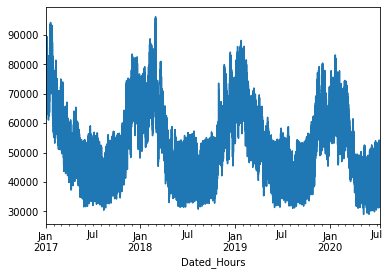

In [195]:
# calculate hourly sum
df1.Consumption.resample('H').mean().plot()

In [213]:
df1.columns = df1.columns.str.replace(r'\s+', '')
df1.columns = df1.columns.str.replace(r'-','_')
list(df1.columns.values)


['Perimeter',
 'Nature',
 'Consumption',
 'ForecastD_1',
 'ForecastJ',
 'Fueloil',
 'Coal',
 'Gas',
 'Nuclear',
 'Wind',
 'Solar',
 'Hydraulic',
 'Pumping',
 'Bioenergies',
 'Ech.physical',
 'Co2rate',
 'Ech.comm.England',
 'Ech.comm.Spain',
 'Ech.comm.Italy',
 'Ech.comm.Swiss',
 'Ech.comm.Germany_Belgium',
 'Fueloil_TAC',
 'Fueloil_Cogen.',
 'Fueloil_Others',
 'Gas_TAC',
 'Gas_Cogen.',
 'Gas_CCG',
 'Gas_Others',
 'Hydraulic_Streamofwater+lock',
 'Hydraulics_Lakes',
 'Hydraulics_STEPturbines',
 'Bioenergies_Waste',
 'Bioenergies_Biomass',
 'Bioenergies_Biogas']

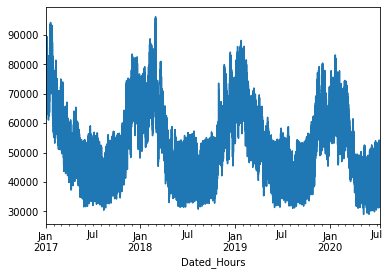

In [214]:
df1.Consumption.resample('H').mean().plot()

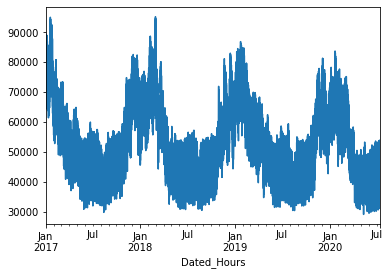

In [215]:
df1.ForecastD_1.resample('H').mean().plot()

In [268]:
# see resample result
df1_mean = df1.resample('H').mean().to_csv('data_resample.csv',index=1)

In [221]:
df1_mean.head()

,Consumption,ForecastD_1,ForecastJ,Fueloil,Coal,Gas,Nuclear,Wind,Solar,Hydraulic,...,Fueloil_Others,Gas_Cogen.,Gas_CCG,Gas_Others,Hydraulic_Streamofwater+lock,Hydraulics_Lakes,Hydraulics_STEPturbines,Bioenergies_Waste,Bioenergies_Biomass,Bioenergies_Biogas
Dated_Hours,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,75620.0,75162.5,75412.5,382.5,1542.5,7121.5,53492.0,289.0,-1.0,6731.5,...,269.0,2373.0,4689.5,56.0,2654.5,3562.5,515.5,559.0,285.5,250.5
2017-01-01 01:00:00,72797.0,73637.5,73637.5,591.5,1159.5,6594.0,53430.0,359.0,-1.0,5492.5,...,474.0,2376.0,4149.0,61.0,2599.0,2487.0,406.0,557.0,284.0,254.0
2017-01-01 02:00:00,71978.0,71875.0,72100.0,616.5,1040.0,6476.0,53351.5,357.0,-1.0,4986.0,...,499.0,2335.5,4071.0,61.5,2398.0,2452.5,136.0,557.5,285.5,255.0
2017-01-01 03:00:00,68878.5,68375.0,68500.0,554.5,1019.5,6040.5,53111.0,340.5,-1.0,4767.0,...,437.0,2340.5,3631.0,61.5,2325.5,2441.5,0.0,556.0,284.5,253.5
2017-01-01 04:00:00,65907.0,65700.0,65775.0,369.5,981.5,5654.5,53089.5,384.0,-1.0,4282.5,...,252.5,2329.5,3255.5,61.0,2274.0,1903.0,105.0,557.0,282.0,251.5


In [262]:
#subset
dfnew = pd.read_csv("combined_energy_data.csv",parse_dates=["datetime"], index_col="datetime")

df2 = dfnew.iloc[:, 36:69]
df2.to_csv('stage2.csv',index=1)
df2.head()

,guitrancourt_Speed(m/s),guitrancourt_Direction (deg N),lieusaint_Speed(m/s),lieusaint_Direction (deg N),lvs-pussay_Speed(m/s),lvs-pussay_Direction (deg N),parc-du-gatinais_Speed(m/s),parc-du-gatinais_Direction (deg N),arville_Speed(m/s),arville_Direction (deg N),...,parc-du-gatinais-b_Speed(m/s),parc-du-gatinais-b_Direction (deg N),arville-b_Speed(m/s),arville-b_Direction (deg N),boissy-la-riviere-b_Speed(m/s),boissy-la-riviere-b_Direction (deg N),angerville-1-b_Speed(m/s),angerville-1-b_Direction (deg N),angerville-2-b_Speed(m/s),angerville-2-b_Direction (deg N)
datetime,,,,,,,,,,,,,,,,,,,,,
2016-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 22:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [263]:
df2.head(10)

,guitrancourt_Speed(m/s),guitrancourt_Direction (deg N),lieusaint_Speed(m/s),lieusaint_Direction (deg N),lvs-pussay_Speed(m/s),lvs-pussay_Direction (deg N),parc-du-gatinais_Speed(m/s),parc-du-gatinais_Direction (deg N),arville_Speed(m/s),arville_Direction (deg N),...,parc-du-gatinais-b_Speed(m/s),parc-du-gatinais-b_Direction (deg N),arville-b_Speed(m/s),arville-b_Direction (deg N),boissy-la-riviere-b_Speed(m/s),boissy-la-riviere-b_Direction (deg N),angerville-1-b_Speed(m/s),angerville-1-b_Direction (deg N),angerville-2-b_Speed(m/s),angerville-2-b_Direction (deg N)
datetime,,,,,,,,,,,,,,,,,,,,,
2016-12-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 22:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:00:00,1.86,212.0,1.5,223.0,1.71,222.0,1.45,222.0,1.45,223.0,...,2.51,225.0,2.52,225.0,2.73,226.0,2.74,228.0,2.74,228.0


In [264]:
df2_mean = df2.resample('H').mean()

In [267]:
# see interpolate result
df2_mean.interpolate(method ='linear', limit_direction ='forward').to_csv('data_interpolate.csv',index=1)